# Step 1: Load and Prepare the Data
## Load the Data: Use a tool like Python (with Pandas) to load the dataset.
## Clean the Data: Ensure there are no missing values or inconsistencies.
## Transform the Data: Create new columns or adjust existing ones to facilitate your analysis. For example, convert timestamps to datetime objects.


In [1]:
import pandas as pd
# Load the data
data = pd.read_excel('Data Analyst _ Sample Data _HDM.xlsx')

In [2]:
data

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24618,51694,452649,930270,1883,d449d4aewcze1ec687663hcne4373a65,completed,Not Interested,30,21,9.186570e+11,7.837713e+09,1,2024-05-15 19:18:00,2024-05-15 19:18:31,2804,Niharika Bhatt
24619,51695,452648,930270,1883,43d96decjcle1ec687663zcnf55dce0f,completed,Call Back,34,23,9.186570e+11,9.915516e+09,1,2024-05-15 19:18:30,2024-05-15 19:19:09,2804,Niharika Bhatt
24620,51696,452647,930270,1883,ff5897edxcwe1ec687663zcva2756b59,completed,Not Interested,79,60,9.186570e+11,9.166733e+09,1,2024-05-15 19:19:09,2024-05-15 19:20:29,2804,Niharika Bhatt
24621,51697,452646,930270,1883,b485f83fjcle1ec687663kcy54cfacf3,no-answer,Voice Issue,16,0,9.186570e+11,9.888255e+09,1,2024-05-15 19:20:28,2024-05-15 19:20:45,2804,Niharika Bhatt


# Convert timestamps to datetime

In [3]:
data['Created At'] = pd.to_datetime(data['Created At'])
data['Updated At'] = pd.to_datetime(data['Updated At'])

# Step 2: Calculate Metrics

In [4]:
total_calls = data['Call Id'].nunique()
unique_leads = data['Lead Id'].nunique()
calls_connected = data[data['Call Status'] == 'completed']['Call Id'].count()
unique_calls_connected = data[data['Call Status'] == 'completed']['Lead Id'].nunique()
leads_converted = data[data['Lead Status'] == 'Interested']['Call Id'].count()
leads_lost = data[data['Lead Status'] == 'Not Interested']['Call Id'].count()
average_agent_call_duration = data['Agent Duration(seconds)'].mean()
average_customer_call_duration = data['Customer Duration(seconds)'].mean()

In [5]:
lead_disposition = data['Lead Status'].value_counts()

In [6]:
agent_performance = data.groupby('Agent Name').agg(
    calls_made=('Call Id', 'count'),
    calls_connected=('Call Status', lambda x: (x == 'completed').sum()),
    leads_converted=('Lead Status', lambda x: (x == 'Interested').sum()),
    avg_agent_duration=('Agent Duration(seconds)', 'mean'),
    avg_customer_duration=('Customer Duration(seconds)', 'mean')
).reset_index()

# Step 3: Visualize the Data
## Use a visualization tool like Matplotlib, Seaborn, or Tableau to create charts and graphs for each report.

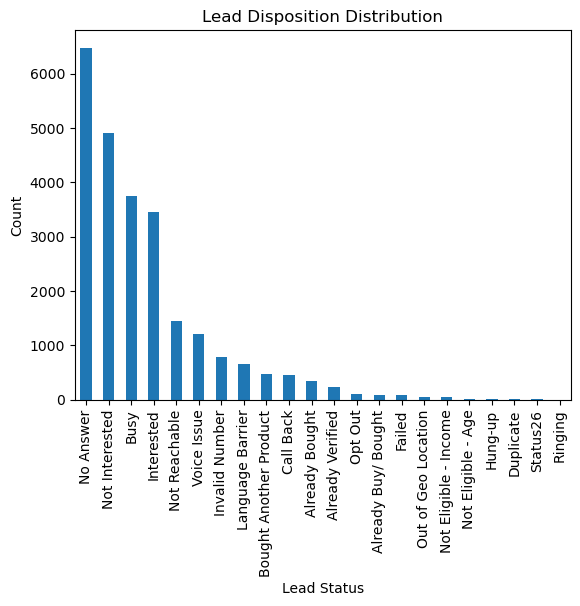

In [7]:
import matplotlib.pyplot as plt

# Bar chart for Lead Disposition
lead_disposition.plot(kind='bar')
plt.title('Lead Disposition Distribution')
plt.xlabel('Lead Status')
plt.ylabel('Count')
plt.show()

# Step 4: Forecasting
## Use historical data to create forecasts. For example, using ARIMA for time series forecasting:

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate call counts by day
calls_per_day = data.set_index('Created At').resample('D').size()

# Fit ARIMA model
model = ARIMA(calls_per_day, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

2024-05-16    2509.424763
2024-05-17    2100.676328
2024-05-18    2454.459897
2024-05-19    2472.027433
2024-05-20    2397.497584
2024-05-21    2430.438240
2024-05-22    2363.070859
2024-05-23    2412.220675
2024-05-24    2417.631514
2024-05-25    2400.991440
2024-05-26    2410.816203
2024-05-27    2399.997415
2024-05-28    2406.366846
2024-05-29    2408.050190
2024-05-30    2404.581096
2024-05-31    2406.752746
2024-06-01    2405.088330
2024-06-02    2405.809850
2024-06-03    2406.263334
2024-06-04    2405.577600
2024-06-05    2405.996153
2024-06-06    2405.756660
2024-06-07    2405.814355
2024-06-08    2405.922912
2024-06-09    2405.793484
2024-06-10    2405.867060
2024-06-11    2405.836184
2024-06-12    2405.834562
2024-06-13    2405.858355
2024-06-14    2405.834964
Freq: D, Name: predicted_mean, dtype: float64


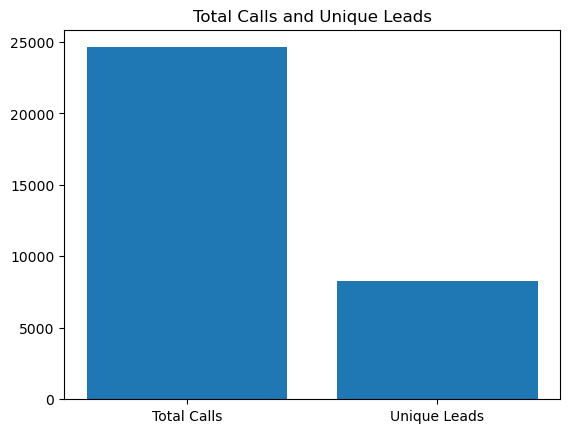

In [9]:
fig, ax = plt.subplots()
ax.bar(['Total Calls', 'Unique Leads'], [total_calls, unique_leads])
ax.set_title('Total Calls and Unique Leads')
plt.show()